In [2]:
import webber
from networkx import DiGraph
from dag_latency import first, second, third, fourth
from dag_complex import adder, muxer, print_and_wait

In [3]:
dag = webber.DAG()
dag.add_node(first)
dag.add_node(second)
dag.add_node(third)
dag.add_node(fourth)
dag.execute()

2024-01-22 16:01:05,873           third: 3
2024-01-22 16:01:05,876          fourth: 4
2024-01-22 16:01:05,879          second: 2
2024-01-22 16:01:05,882           first: 1


In [4]:
G = DiGraph([
    (first, second),
    (second, third),
    (third, fourth)
])
dag = webber.DAG(G)
dag.execute()

2024-01-22 16:01:07,860           first: 1
2024-01-22 16:01:08,954          second: 2
2024-01-22 16:01:10,081           third: 3
2024-01-22 16:01:11,202          fourth: 4


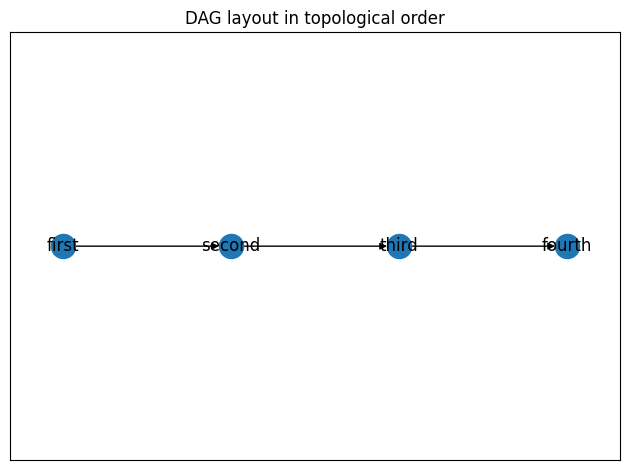

In [6]:
dag.visualize()

In [7]:
dag = webber.DAG()

ref_first, ref_sec = dag.add_edge(first, second)
_, ref_third = dag.add_edge(ref_sec, third)
_, ref_fourth = dag.add_edge(ref_third, fourth)

dag.execute()

2024-01-22 16:01:54,466           first: 1
2024-01-22 16:01:55,526          second: 2
2024-01-22 16:01:56,701           third: 3
2024-01-22 16:01:57,766          fourth: 4


In [8]:
dag = webber.DAG()

one_foo   = dag.add_node(print_and_wait, "Hello!", "This should be first!", sleep_time=1.0)
three_foo = dag.add_node(print_and_wait, "This is should be second -- or third?!    :-)","    Function B", end="\n\n", sleep_time=0.001)
two_foo   = dag.add_node(print_and_wait, "This is should be second -- or third?!    :-)","    Function A", end="\n", sleep_time=0.1)
four_foo  = dag.add_node(print_and_wait, "I'll show up last.")

dag.add_edge(one_foo, two_foo)
dag.add_edge(one_foo, three_foo)
dag.add_edge(three_foo, four_foo)

dag.execute()

2024-01-22 16:02:03,539  print_and_wait: Hello!
2024-01-22 16:02:03,607  print_and_wait: This should be first!
2024-01-22 16:02:04,684  print_and_wait: This is should be second -- or third?!    :-)
2024-01-22 16:02:04,684  print_and_wait: This is should be second -- or third?!    :-)
2024-01-22 16:02:04,700  print_and_wait:     Function B
2024-01-22 16:02:04,764  print_and_wait:     Function A
2024-01-22 16:02:04,795  print_and_wait: I'll show up last.


In [9]:
G = DiGraph([
    (first, second),
    (second, third),
    (third, fourth)
])
dag = webber.DAG(G)
dag.visualize()

Serving visualization...

 * Serving Flask app 'webber.viz'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jan/2024 16:02:32] "GET / HTTP/1.1" 200 -



Visualization closed.


In [ ]:
dag.visualize(vis_type='plt')